## Introduction

## 🧠 CIFAR-10 Dataset Overview

The **CIFAR-10** dataset is a well-known benchmark in the field of computer vision, consisting of **60,000 32x32 color images** across **10 distinct classes**, such as airplanes, cars, cats, and dogs. With **50,000 training images** and **10,000 test images**, it serves as an ideal playground for developing and evaluating image classification models.


Our labels:
1. Airplane
1. Automobile
1. Bird
1. Cat
1. Deer
1. Dog
1. Frog
1. Horse
1. Ship
1. Truck

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dropout , Dense , Flatten\
, Dropout , BatchNormalization , Activation , Input , Resizing , GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2 , ResNet50 , EfficientNetB1
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess_input
from PIL import Image
from sklearn.metrics import roc_curve
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings("ignore")

2025-06-18 15:44:13.050385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750261453.262562      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750261453.317755      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Config class to store all constant values and hyperparameters 
# used throughout the project (e.g., dataset paths, model settings, training parameters).
class Config:
    
    #LABELS = {"0" : "Airplane",
      #      "1": "Automobile",
       #       "2":"Bird",
        #      "3":"Cat",
         #     "4":"Deer",
          #    "5":"Dog",
           #   "6":"Frog",
            #  "7":"Horse",
             # "8":"Ship",
              #"9":"Truck",}
    
    LABELS = ["Airplane" , "Automobile" , "Bird" , "Cat" 
              , "Deer" , "Dog" , "Frog" , "Horse" , "Ship" , "Truck"]
    
    EPOCHS = 50

    NUM_CLASSES = 10

    INPUT_SHAPE = (32,32,3)

    BATCH_SIZE = 128

    FILTER_SIZE_1 = 32

    FILTER_SIZE_2 = 64

    FILTER_SIZE_3 = 128
    
    
                 
                
    def __init__(self):
        pass
    @classmethod
    def get_labels(cls):
        return cls.LABELS
    @classmethod
    def get_epochs(cls):
        return cls.EPOCHS
    @classmethod
    def get_num_classes(cls):
        return cls.NUM_CLASSES
    @classmethod
    def get_input_shape(cls):
        return cls.INPUT_SHAPE
    @classmethod
    def get_batch_size(cls):
        return cls.BATCH_SIZE
    @classmethod
    def get_filter_1(cls):
        return cls.FILTER_SIZE_1
    @classmethod
    def get_filter_2(cls):
        return cls.FILTER_SIZE_2
    @classmethod
    def get_filter_3(cls):
        return cls.FILTER_SIZE_3

    

In [3]:
#DataLoader class that loads cifar-10 from api
class DataLoader:
    def __init__(self):
        pass
    @staticmethod
    def data_loader(x_train):
        if isinstance(x_train , pd.DataFrame):
            print("There is no need to load data again")
            return (x_train , y_train) , (x_test , y_test)
        else:
            print("Img data is loading...")
            return cifar10.load_data()

In [4]:
x_train = []
(x_train, y_train), (x_test, y_test) = DataLoader.data_loader(x_train)

Img data is loading...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## EDA and Visualization

In [5]:
#Helper methods for data preprocessing, like softmax-to-one-hot conversion.
class DataUtils:
    
    def __init__(self):
        pass
    @staticmethod
    def reshaper(x_train , x_test , *args):
        if x_train is pd.DataFrame:
            raise TypeError("Values are pandas DataFrame they should be Numpy arrays")

        x_train = x_train.reshape(-1,*args)
        x_test = x_test.reshape(-1,*args)
            
        
        return x_train , x_test
    #nparray to pd dataframe converter
    @staticmethod
    def nparray_to_pd_dataframe(x_train,y_train,x_test,y_test):
        try:
            assert type(x_train) != pd.core.frame.DataFrame
        except AssertionError:
            print("Error train and test attributes are already a pandas dataframe")
            
        except:
            print("Some error occurded")
            
        else:
            x_train , x_test = DataUtils.reshaper(x_train , x_test,3072)
            x_train = pd.DataFrame(x_train)
            x_test = pd.DataFrame(x_test)
            y_train = pd.DataFrame(y_train)
            y_test = pd.DataFrame(y_test)
            return x_train,y_train,x_test,y_test
      #Normalizer function
    @staticmethod
    def rescaler(df):
        try:
            if df is pd.DataFrame:
                assert df.iloc[1,2]>1
            else:
                assert df[0][0][0][0]>1
                
        except AssertionError:
            print("Data is Already Normalized")
            return df
        except:
            print("Some Error occurded")
            return df
        else:
            return df/255
    @staticmethod
    def softmax_to_one_hot_encoding(input):
        temp = np.zeros_like(input)
        temp[np.argmax(input)] = 1
        return temp
    @staticmethod
    def int_to_one_hot_encoding(input , lenght):
        temp = np.zeros(lenght)
        temp[input] = 1
        return temp
        
    
        

In [6]:
#To visualize our data
class Visualization:
    def __init__(self):
        pass
    @staticmethod
    def class_distibution_visualization(df,label):
        plt.pie(df.value_counts(),autopct = '%1.1f%%')
        plt.title(label)
        print(f"Number of samples :  {len(df)}")
        plt.show()
    @staticmethod
    def some_samples(x,y):
        for i in range(1,10):
            labels = Config.get_labels()
            index = np.random.randint(0,x.shape[0])
            img = x.T[index].to_numpy().reshape(32,32,3)
            plt.subplot(3,3,i)
            plt.axis("off")
            plt.title(labels[y.iloc[index][0]])
            plt.imshow(img)
        plt.tight_layout()
        plt.show()

In [7]:
dfx_train,dfy_train,dfx_test,dfy_test = \
    DataUtils.nparray_to_pd_dataframe(x_train,y_train,x_test,y_test)    

Number of samples :  50000


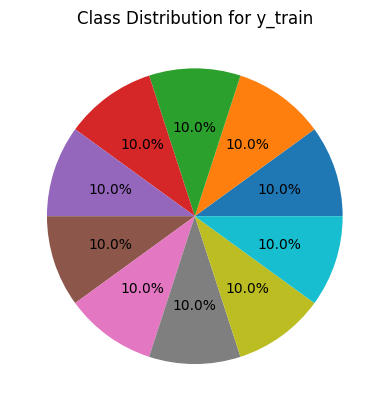

In [8]:
#class_distribution_visualization for y_train
Visualization.class_distibution_visualization(dfy_train , "Class Distribution for y_train")

Number of samples :  10000


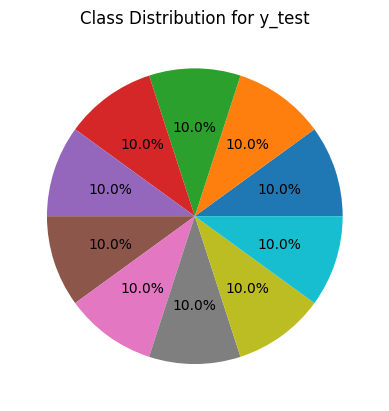

In [9]:
#class_distibution_visualization for y_test
Visualization.class_distibution_visualization(dfy_test , "Class Distribution for y_test")

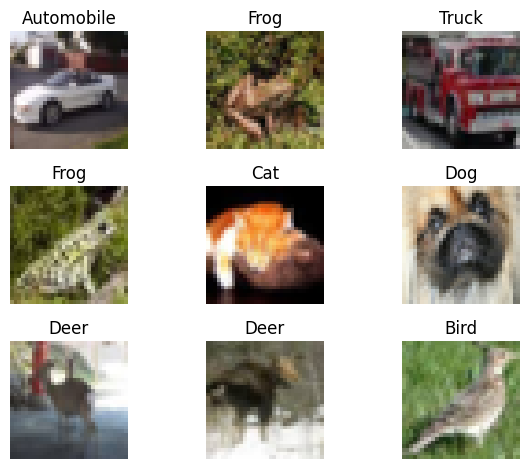

In [10]:
#Some samples
Visualization.some_samples(dfx_train , dfy_train)

In [11]:
dfx_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,130.710740,136.05614,132.553800,130.14036,135.442380,131.853580,131.050440,136.24616,132.581440,131.568860,...,113.877800,126.778360,125.697080,113.830580,126.564960,125.617420,113.906240,126.639080,125.850300,114.381860
std,73.412873,72.90798,80.449751,72.44259,71.901316,79.598048,72.240546,71.67471,79.434675,72.016555,...,64.738943,63.954763,61.591233,64.894603,64.178427,61.831646,65.212671,64.926283,62.649286,66.077526
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,77.00000,61.000000,71.00000,78.000000,61.000000,73.000000,79.00000,62.000000,73.000000,...,64.000000,79.000000,81.000000,64.000000,79.000000,81.000000,64.000000,78.000000,80.000000,63.000000
50%,128.000000,135.00000,127.000000,127.00000,135.000000,127.000000,129.000000,136.00000,128.000000,130.000000,...,106.000000,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000
75%,189.000000,195.00000,207.000000,188.00000,193.000000,206.000000,188.000000,194.00000,206.000000,188.000000,...,157.000000,172.000000,167.000000,157.000000,172.000000,167.000000,157.000000,172.000000,168.000000,158.000000
max,255.000000,255.00000,255.000000,255.00000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [12]:
dfx_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,130.535400,136.046200,132.830000,129.993900,135.511300,132.23110,131.145000,136.65770,133.233700,132.146800,...,114.760400,127.121400,126.143700,114.844100,126.517300,125.758800,114.776000,126.548300,126.002600,115.327100
std,73.333214,72.690423,80.134163,72.397388,71.740927,79.18629,72.288499,71.63948,79.172435,71.739001,...,64.333828,63.462211,60.866895,64.443142,63.784916,61.196315,64.911164,64.601056,62.021345,65.662591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,78.000000,62.000000,71.000000,79.000000,62.00000,73.000000,80.00000,63.000000,75.000000,...,65.000000,79.000000,82.000000,65.000000,79.000000,81.000000,65.000000,78.000000,81.000000,65.000000
50%,127.000000,135.000000,128.000000,127.000000,135.000000,128.00000,128.000000,136.00000,129.000000,129.000000,...,107.000000,124.000000,123.000000,106.000000,123.000000,122.000000,106.000000,123.000000,123.000000,106.000000
75%,188.000000,195.000000,207.000000,187.000000,193.000000,205.00000,189.000000,195.00000,206.250000,190.000000,...,158.000000,172.000000,167.000000,158.000000,172.000000,167.000000,158.000000,171.000000,168.000000,160.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.00000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


## Training

In [13]:
#Our model
class Model:
    def __init__(self , config):
        self.config = config
        self.model = None
    
    def build_model(self):
        model = Sequential()
        
        #1. CNN + BatchNormalization + Activation 
        model.add(Conv2D(kernel_size = (3,3) , filters = self.config.get_filter_1() , input_shape = self.config.get_input_shape(),padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("elu"))

        #2. CNN + BatchNormalization + Activation + Maxpooling
        model.add(Conv2D(kernel_size = (3,3) , filters = self.config.get_filter_1()  ,padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("elu"))
        model.add(MaxPool2D(pool_size = (2,2)))


        #3. CNN + BatchNormalization + Acvivation
        model.add(Conv2D(kernel_size = (3,3) , filters = self.config.get_filter_2()  ,padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))

        #4. CNN + BatchNormalization + Activation + Dropout
        model.add(Conv2D(kernel_size = (3,3) , filters = self.config.get_filter_3()  ,padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(Dropout(0.1))

        #5. CNN + BatchNormalization + Activation + Maxpooling + Dropout
        model.add(Conv2D(kernel_size = (3,3) , filters = self.config.get_filter_3() ,padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(MaxPool2D(pool_size = (2,2)))
        model.add(Dropout(0.1))

        #5. CNN + BatchNormalization + Activation
        model.add(Conv2D(kernel_size = (3,3) , filters = self.config.get_filter_3() ,padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        
        #6. CNN + BatchNormalization + Activation
        model.add(Conv2D(kernel_size = (3,3) , filters = self.config.get_filter_3() ,padding = "same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))

        #Fully Connected layer
        model.add(Flatten())
        model.add(Dense(self.config.get_filter_3() , activation = "relu"))
        model.add(Dense(self.config.get_num_classes(), activation = "softmax"))
        self.model = model
    def compile_model(self):
        optimizer = Adam()
        if self.model is None:
            raise ValueError("Error you must build the model first by using build_model function")
            return False
        self.model.compile(
            loss = "sparse_categorical_crossentropy",
            optimizer = optimizer,
            metrics = ["accuracy"],)
        
    def train_model(self , augmentedimages,x_test , y_test):
        if self.model is None:
            raise ValueError("Error you must build the model first by using build_model function and Use the compile_model to compile model")
        earlystopping = EarlyStopping(
            monitor = "val_accuracy",
            patience = 5,
            restore_best_weights=True
    
        )
        history = self.model.fit(augmentedimages,epochs = self.config.get_epochs() ,validation_data = [x_test , y_test],callbacks = [earlystopping])
        return history
        
    def predictfunc(self , X_test):
        if self.model is None:
            raise ValueError("Error you must build the model first by using build_model function and Use the compile_model to compile model")
            return False
        y_pred = self.model.predict(X_test)
        return y_pred

In [14]:
#Pipeline
#Loading Data
(x_train, y_train), (x_test, y_test) = DataLoader.data_loader(x_train)

Img data is loading...


In [15]:
#Normalizing
x_train = DataUtils.rescaler(x_train)
x_test = DataUtils.rescaler(x_test)

In [16]:
#Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,

)

augmented_images = datagen.flow(x_train, y_train, batch_size=Config.get_batch_size())

In [17]:
#Training
model = Model(Config)
model.build_model()
model.compile_model()
model.train_model(augmented_images , x_test , y_test)

I0000 00:00:1750261488.448184      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/50


I0000 00:00:1750261497.153822      60 service.cc:148] XLA service 0x7a4178003c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750261497.154501      60 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750261497.884047      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


  4/391 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0889 - loss: 4.4203

I0000 00:00:1750261503.369800      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 79ms/step - accuracy: 0.3378 - loss: 1.9492 - val_accuracy: 0.4030 - val_loss: 1.7482
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.5716 - loss: 1.2000 - val_accuracy: 0.6017 - val_loss: 1.1942
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.6528 - loss: 0.9886 - val_accuracy: 0.6849 - val_loss: 0.9144
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.6941 - loss: 0.8643 - val_accuracy: 0.7055 - val_loss: 0.8553
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.7191 - loss: 0.7991 - val_accuracy: 0.6906 - val_loss: 0.9586
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.7508 - loss: 0.7178 - val_accuracy: 0.7347 - val_loss: 0.8180
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.7655 - loss: 0.6694 - val_accuracy: 0.7824 - val_loss: 0.6604
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.7816 - loss: 0.6259 - val_accurac

In [18]:
#Model
model.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │              

 Total params: 4,790,848 (18.28 MB)

 Trainable params: 1,596,522 (6.09 MB)

 Non-trainable params: 1,280 (5.00 KB)

 Optimizer params: 3,193,046 (12.18 MB)

In [19]:
# Prediction
y_pred = model.predictfunc(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


# Evaulating

After training, the model outputs a softmax vector for each test sample.</br> 
Each element in this vector represents the probability assigned to a specific class. </br>
The class with the highest probability is selected as the predicted class

In [20]:
#Provides evaluation utilities including ROC curve plotting
#and visualization of softmax probabilities as bar plots for sample images.
class Evaulate:
    
    def __init__(self):
        
        pass

    #roc_curve visualization
    @staticmethod
    def some_roc_curve_visualization(y_true , y_pred):
        y_true_one_hot_encoded = np.array([DataUtils.int_to_one_hot_encoding(i, 10) for i in y_true])
        y_pred_softmax = np.array(y_pred)

        plt.figure(figsize=(10, 8))
        for i in range(10):
            fpr, tpr, _ = roc_curve(y_true_one_hot_encoded[:, i], y_pred_softmax[:, i])
            plt.plot(fpr, tpr, label = Config.get_labels()[i])

        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve for Each Class")
        plt.legend()
        plt.grid(True)
        plt.show()
        
    #class probability distribution
    @staticmethod
    def some_probabilities(x_test, y_pred):
        labels = Config.get_labels() 
        plt.figure(figsize=(9, 9))
        plt.suptitle("Prediction Probabilities for Sample Images")
        for i in range(6):
            sample = np.random.randint(0,len(y_pred))
            firstindex = i*2
            secondindex = i*2+1
            plt.subplot(3,4,firstindex+1)
            plt.imshow(x_test[sample])
            plt.axis("off")
            plt.subplot(3,4,secondindex+1)
            sns.barplot(x = Config.get_labels() , y = y_pred[sample])
            plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()
    @staticmethod
    def model_comprasion(models , modelnames):
        counter = 1
        for i in models:
            plt.subplot(3,1,counter)
            plt.title(modelnames[counter-1])
            sns.lineplot(y = i.history.history["val_accuracy"] , x = [1,2,3,4,5,6,7,8,9,10])
            plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10])
            plt.xlabel("Number of Epoch")
            plt.ylabel("Accuracy")
            counter+=1
        plt.tight_layout()
        plt.show()
        
        

## Roc Curve

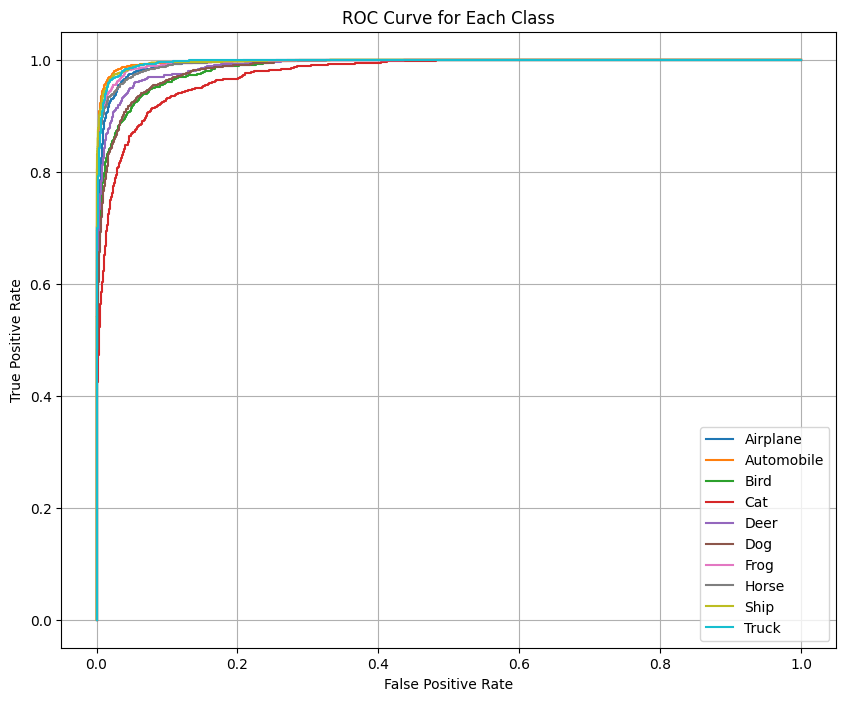

In [21]:
Evaulate.some_roc_curve_visualization(y_test , y_pred)

## Class Probability Distribution

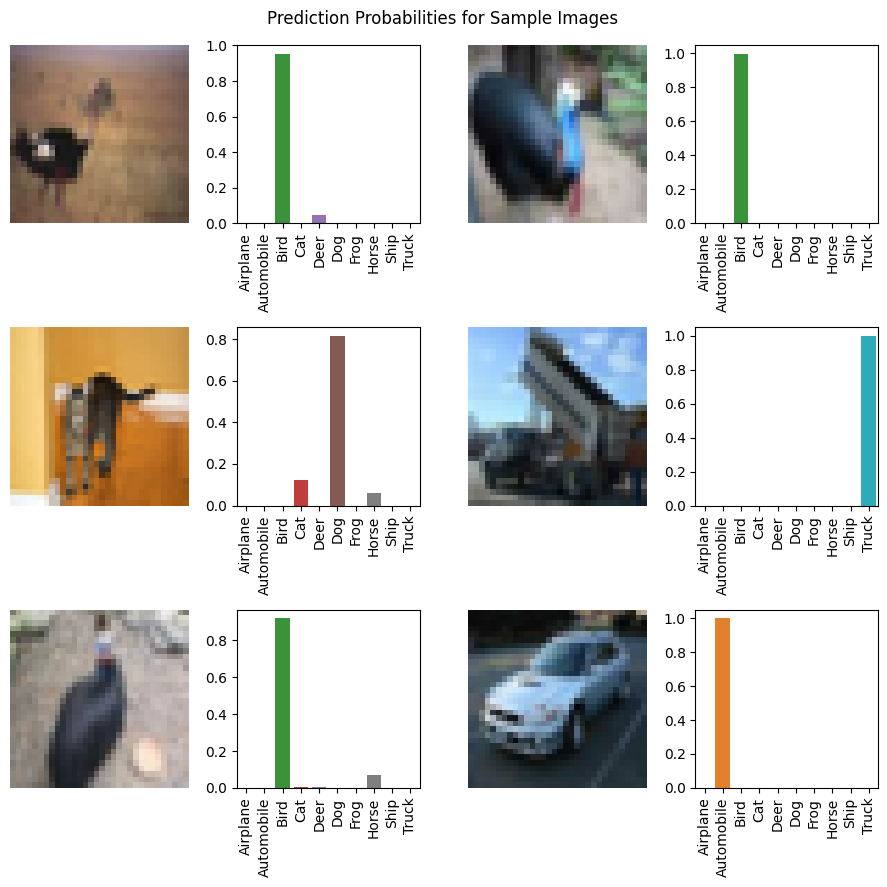

In [22]:
Evaulate.some_probabilities(x_test , y_pred)

# Pre Trained Models

In [23]:
class KerasModels(tf.keras.Model):
    def __init__(self ,basemodelnumber,resize = (128,128),num_classes = 10 , trainable = False):
        super().__init__()
        
        self.resizing = Resizing(resize[0],resize[1])

        if(basemodelnumber == 0):
            self.preprocess_input = mobilenet_preprocess_input
            self.basemodel = MobileNetV2(include_top = False ,weights = "imagenet")
            
        elif(basemodelnumber == 1):
            self.preprocess_input = resnet_preprocess_input
            self.basemodel = ResNet50(include_top = False ,weights = "imagenet")
            
        elif(basemodelnumber == 2):
            self.preprocess_input = efficientnet_preprocess_input
            self.basemodel = EfficientNetB1(include_top = False ,weights = "imagenet")
            
        else:
            raise Exception("Model number should be between 0-2")
            
        
        
        self.basemodel.trainable = trainable
        self.globalaveragepooling = GlobalAveragePooling2D()
        
        self.dense1 = Dense(256 , activation = "relu")
        self.bt1 = BatchNormalization()
        self.dropout1 = Dropout(0.1)

        
        self.dense2 = Dense(256 , activation = "relu")
        self.bt2 = BatchNormalization()
        self.dropout2 = Dropout(0.1)

        self.dense3 = Dense(128 , activation = "relu")
        self.bt3 = BatchNormalization()
        self.dropout3 = Dropout(0.1)
        
        self.output_layer = Dense(num_classes ,activation = "softmax")
        
        
    def call(self , inputs , training = False):
        x = self.resizing(inputs)
        x = self.preprocess_input(x*255)

        x = self.basemodel(x , training = training)
        x = self.globalaveragepooling(x)
        
        x = self.dense1(x)
        x = self.bt1(x)
        x = self.dropout1(x)
        
        x = self.dense2(x)
        x = self.bt2(x)
        x = self.dropout2(x,training = training)

        x = self.dense3(x)
        x = self.bt3(x)
        x = self.dropout3(x,training = training)
        
        return self.output_layer(x)
    
    def compile_model(self , optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"] ):
        super().compile(optimizer = optimizer , loss = loss , metrics = metrics)
    def fit_model(self , train_data , validation_data , epochs = 10):
        earlystopping = EarlyStopping(
            restore_best_weights=True,
            patience=8,
            monitor = "val_accuracy",)
        super().fit(train_data , validation_data =validation_data,epochs = epochs , callbacks = [earlystopping])
        
        
        

## MobileNetV2

In [24]:
mobilenetv2 = KerasModels(0)
mobilenetv2.compile_model()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
mobilenetv2.fit_model(augmented_images , [x_test , y_test])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 97ms/step - accuracy: 0.6171 - loss: 1.1343 - val_accuracy: 0.8231 - val_loss: 0.5161
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7444 - loss: 0.7397 - val_accuracy: 0.8332 - val_loss: 0.4754
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7561 - loss: 0.6968 - val_accuracy: 0.8432 - val_loss: 0.4540
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.7630 - loss: 0.6776 - val_accuracy: 0.8426 - val_loss: 0.4576
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7750 - loss: 0.6450 - val_accuracy: 0.8460 - val_loss: 0.4502
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.7757 - loss: 0.6469 - val_accuracy: 0.8365 - val_loss: 0.4607
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7809 - loss: 0.6308 - val_accuracy: 0.8466 - val_loss: 0.4360
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.7858 - loss: 0.6146 - 

In [26]:
mobilenetv2.summary()

Model: "keras_models"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, None, None, 1280)    │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,546,848 (13.53 MB)

 Trainable params: 429,194 (1.64 MB)

 Non-trainable params: 2,259,264 (8.62 MB)

 Optimizer params: 858,390 (3.27 MB)

## ResNet50

In [27]:
resnet50 = KerasModels(1)
resnet50.compile_model()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
resnet50.fit_model(augmented_images , [x_test , y_test])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 114ms/step - accuracy: 0.6845 - loss: 0.9316 - val_accuracy: 0.8634 - val_loss: 0.3925
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7962 - loss: 0.5783 - val_accuracy: 0.8735 - val_loss: 0.3611
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8138 - loss: 0.5300 - val_accuracy: 0.8878 - val_loss: 0.3276
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.8267 - loss: 0.4988 - val_accuracy: 0.8887 - val_loss: 0.3232
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.8356 - loss: 0.4726 - val_accuracy: 0.8870 - val_loss: 0.3322
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.8373 - loss: 0.4656 - val_accuracy: 0.8900 - val_loss: 0.3219
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.8431 - loss: 0.4496 - val_accuracy: 0.8881 - val_loss: 0.3245
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.8451 - loss: 0.4398 -

In [29]:
resnet50.summary()

Model: "keras_models_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, None, None, 2048)    │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,466,400 (97.15 MB)

 Trainable params: 625,802 (2.39 MB)

 Non-trainable params: 23,588,992 (89.98 MB)

 Optimizer params: 1,251,606 (4.77 MB)

## EfficientNetB1

EfficientNetB1 would be enough for cifar-10 dataset

In [30]:
efficientnetb1 = KerasModels(2)
efficientnetb1.compile_model()

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
efficientnetb1.fit_model(augmented_images , [x_test , y_test])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 102s 152ms/step - accuracy: 0.6450 - loss: 1.0792 - val_accuracy: 0.8536 - val_loss: 0.4308
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7623 - loss: 0.6905 - val_accuracy: 0.8669 - val_loss: 0.3897
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7837 - loss: 0.6251 - val_accuracy: 0.8768 - val_loss: 0.3664
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.7960 - loss: 0.5937 - val_accuracy: 0.8801 - val_loss: 0.3512
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7977 - loss: 0.5823 - val_accuracy: 0.8801 - val_loss: 0.3489
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8081 - loss: 0.5559 - val_accuracy: 0.8825 - val_loss: 0.3408
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8053 - loss: 0.5558 - val_accuracy: 0.8813 - val_loss: 0.3417
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8155 - loss: 0.5370 

In [32]:
efficientnetb1.summary()

Model: "keras_models_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb1 (Functional)          │ (None, None, None, 1280)    │       6,575,239 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,864,103 (30.00 MB)

 Trainable params: 429,194 (1.64 MB)

 Non-trainable params: 6,576,519 (25.09 MB)

 Optimizer params: 858,390 (3.27 MB)

In [33]:
resnet50.history.history["val_accuracy"]

[0.8633999824523926,
 0.8734999895095825,
 0.8877999782562256,
 0.888700008392334,
 0.8870000243186951,
 0.8899999856948853,
 0.8881000280380249,
 0.8939999938011169,
 0.8907999992370605,
 0.8927000164985657]

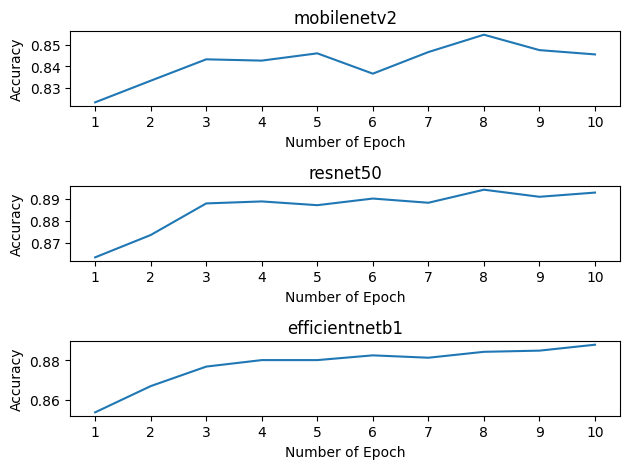

In [34]:
models = [mobilenetv2 , resnet50 , efficientnetb1]
modelnames = ["mobilenetv2" , "resnet50" , "efficientnetb1"]
Evaulate.model_comprasion(models , modelnames)   

---
<font color = "#4CAF50">Thank you for following along! In this notebook, we explored the CIFAR-10 dataset, built and trained several state-of-the-art image classification models including ResNet50, MobileNetV2, and EfficientNetB1, and evaluated their performance using metrics like accuracy and ROC curves. I hope this provides a clear understanding of these architectures and their application to real-world image classification tasks. 

<font color = "#FF5722">Feel free to share your feedback or any suggestions for improvement. And don't forget to upvote! Happy coding! 🚀</font>
